In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

print (tf.__version__)
#import tensorflow.examples.tutorials.mnist.input_data as input_data
#mnist = input_data.read_data_sets("MNIST_data/",one_hot = True)

2.0.0


In [2]:
mnist = tf.keras.datasets.mnist
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

In [3]:
print("Training image shape:",train_images.shape,"Train label shape",train_labels.shape)
print("Test image shape",test_images.shape,"Test label shape",test_labels.shape)

Training image shape: (60000, 28, 28) Train label shape (60000,)
Test image shape (10000, 28, 28) Test label shape (10000,)


#### 具体查看一副图像数据

In [4]:
print("label data",train_labels[1])   #第二幅图片的数字（0）
#print("image data",train_images[1])

label data 0


#### 定义一个可视化函数

In [5]:
def plot_image(image):
    plt.imshow(image.reshape(28,28),cmap='binary')
    plt.show()

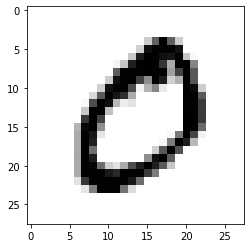

In [6]:
plot_image(train_images[1])

#### 划分验证集，2.0版本的mnist没划分，需要自己手动划分

In [7]:
total_num = len(train_images)
valid_split = 0.2
train_num = int(total_num*(1-valid_split))  #训练集的数目

train_x = train_images[:train_num]#前部分给训练集
train_y = train_labels[:train_num]

valid_x = train_images[train_num:]#后20%给验证集
valid_y = train_labels[train_num:]

test_x = test_images
test_y = test_labels

In [8]:
valid_x.shape

(12000, 28, 28)

In [9]:
valid_y.shape

(12000,)

In [10]:
#把28x28的结构拉直为一行784
train_x = train_x.reshape(-1,784)
valid_x = valid_x.reshape(-1,784)
test_x = test_x.reshape(-1,784)

### 特征数据归一化

In [11]:
train_x = tf.cast(train_x/255.0, tf.float32)
valid_x = tf.cast(valid_x/255.0, tf.float32)
test_x = tf.cast(test_x/255.0, tf.float32)

In [12]:
#train_x[1]

### 独热编码

In [13]:
#x = [3,4]#demo
#tf.one_hot(x, depth=10) #10分类

In [14]:
train_y = tf.one_hot(train_y, depth=10)
valid_y = tf.one_hot(valid_y, depth=10)
test_y = tf.one_hot(test_y, depth=10)

In [15]:
train_y

<tf.Tensor: id=10, shape=(48000, 10), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)>

In [16]:
def model(x,w,b):
    pred = tf.matmul(x,w)+b
    return tf.nn.softmax(pred)  #激活

In [17]:
#创建变量
W = tf.Variable(tf.random.normal([784,10],mean=0.0, stddev=1.0, dtype=tf.float32))
B = tf.Variable(tf.zeros([10]),dtype=tf.float32)

In [18]:
#定义损失熵
def loss(x,y,w,b):
    pred = model(x,w,b)
    loss_ = tf.keras.losses.categorical_crossentropy(y_true=y,y_pred=pred)#交叉熵损失函数
    return tf.reduce_mean(loss_)

## 训练模型

In [19]:
training_epochs = 20  #训练轮数
batch_size = 50       #单次训练样本数
learning_rate = 0.001   #学习率

#### 定义梯度计算函数

In [20]:
def grad(x,y,w,b):
    with tf.GradientTape() as tape:
        loss_ = loss(x,y,w,b)
    return tape.gradient(loss_, [w,b])

In [21]:
#优化器
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

In [22]:
def accuracy(x,y,w,b):
    pred = model(x,w,b)
    correct_prediction = tf.equal(tf.argmax(pred,1),tf.argmax(y,1))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

## 模型训练

In [ ]:
total_step = int(train_num/batch_size) #一轮训练有多少批次

loss_list_train = [] #保存训练集loss值列表
loss_list_valid = [] #保存验证集loss值列表
acc_list_train = [] #保存训练集acc值的列表
acc_list_valid = []  #保存验证集acc值的列表

for epoch in range (training_epochs):
    for step in range(total_step):
        xs = train_x[step*batch_size:(step+1)*batch_size]  #取出当前批次的数据
        ys = train_y[step*batch_size:(step+1)*batch_size]
        
        grads = grad(xs, ys, W, B)#计算梯度
        optimizer.apply_gradients(zip(grads, [W,B]))#优化器根据梯度自动调整W和B
        
    loss_train = loss(train_x, train_y, W, B).numpy()
    loss_valid = loss(valid_x, valid_y, W, B).numpy()
    acc_train = accuracy(train_x, train_y, W, B).numpy()
    acc_valid = accuracy(valid_x, valid_y, W, B).numpy()
    loss_list_train.append(loss_train)
    loss_list_valid.append(loss_valid)
    acc_list_train.append(acc_train)
    acc_list_valid.append(acc_valid)
    print("epoch={:3d},train_loss={:.4f},train_acc={:.4f},val_loss={:.4f},val_acc={:.4f}".format(
        epoch+1, loss_train,acc_train,loss_valid,acc_valid))
    

epoch=  1,train_loss=1.5711,train_acc=0.7037,val_loss=1.4717,val_acc=0.7205
epoch=  2,train_loss=0.9912,train_acc=0.7987,val_loss=0.9265,val_acc=0.8092
epoch=  3,train_loss=0.7863,train_acc=0.8355,val_loss=0.7388,val_acc=0.8446
epoch=  4,train_loss=0.6748,train_acc=0.8551,val_loss=0.6395,val_acc=0.8629
epoch=  5,train_loss=0.6023,train_acc=0.8669,val_loss=0.5774,val_acc=0.8763
epoch=  6,train_loss=0.5509,train_acc=0.8760,val_loss=0.5349,val_acc=0.8837
epoch=  7,train_loss=0.5120,train_acc=0.8824,val_loss=0.5037,val_acc=0.8892
epoch=  8,train_loss=0.4819,train_acc=0.8872,val_loss=0.4800,val_acc=0.8932
epoch=  9,train_loss=0.4575,train_acc=0.8918,val_loss=0.4611,val_acc=0.8968
epoch= 10,train_loss=0.4374,train_acc=0.8951,val_loss=0.4457,val_acc=0.8991
epoch= 11,train_loss=0.4204,train_acc=0.8980,val_loss=0.4329,val_acc=0.9008
epoch= 12,train_loss=0.4059,train_acc=0.9005,val_loss=0.4221,val_acc=0.9024
epoch= 13,train_loss=0.3932,train_acc=0.9029,val_loss=0.4127,val_acc=0.9044
epoch= 14,tr

### 显示训练过程数据

In [ ]:
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(loss_list_train,"blue",label="Train Loss")
plt.plot(loss_list_valid,'red',label="Valid Loss")
plt.legend(loc=1) #通过参数loc指定图例位置

In [ ]:
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(acc_list_train,'blue',label="Train Acc")
plt.plot(acc_list_valid,'red',label="Valid Acc")
plt.legend(loc=1)

## 评估模型

In [ ]:
acc_test = accuracy(test_x, test_y, W, B).numpy()
print("Test accuracy:",acc_test)

## 应用模型预测

In [ ]:
#预测函数
def predict(x, w, b):
    pred = model(x, w, b)#计算模型预测值
    result = tf.argmax(pred, 1).numpy()
    return result

In [ ]:
pred_test = predict(test_x, W, B)

In [ ]:
pred_test[1]